<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Details" data-toc-modified-id="Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Details</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example</a></span></li></ul></div>

# Normal Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st


from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

### Introduction

In probability theory, a Normal distribution is a type of continuous probability distribution for a real-valued random variable.  In real life there're many events following normal distribution.

Below we give a few examples of Normal distribution random variables:

* The grades of a course
* The height of the population
* The quality of the products

### Details

The Normal distribution is characterized by two parameters, $\mu$ and $\sigma$. This parameter should be interpreted as the "mean and standard deviation"of the population. 

The values associated a Normal random variable can be $(-\infty,+\infty)$. 

The probability density function is given by

\begin{align*}
  f(x; \mu,\sigma) \equiv  \frac{1 }{\sigma\sqrt[]{2\pi } }e^{\frac{(x-\mu)^2 }{-2\sigma^2}}
\end{align*}

The cumulative density function is usually given by standard form ($\mu=0, \sigma=1$)

\begin{align*}
  \Phi(x; \mu,\sigma) \equiv  \frac{1}{\sqrt[]{2\pi}}{\int_{-\infty}^x}e^{-t^2/2}dt
\end{align*}

* **Mean**: $\mu$
* **Variance**: $\sigma^2$

In [2]:
def norm_plot_pdf_cdf(mean, std):
    nrv = st.norm(mean,std)
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))
    
    xvals = np.linspace(mean-3*std, mean+3*std, 10000)
    ax[0].plot(xvals, nrv.pdf(xvals))
    ax[0].set_title("Probability Density Function")
    
    ax[1].plot(xvals, nrv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
fs1 = FloatSlider(
    value=0, min=-10, max=10,
    step=1, description="Mean",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

In [4]:
fs2 = FloatSlider(
    value=1, min=1, max=100,
    step=1, description="Standar Deviation",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

In [5]:
output = interact(norm_plot_pdf_cdf, mean=fs1, std=fs2)

interactive(children=(FloatSlider(value=0.0, description='Mean', layout=Layout(width='40%'), max=10.0, min=-10…

### Example

Suppose returns in a financial market for a given month have an average of 0.75% and a variance of 0.05%

In [6]:
mean = 0.0075
std = np.sqrt(0.0005)
nrv = st.norm(mean, std)

We can take a single draw to get the return for a particular month

In [7]:
nrv.rvs()

-0.011336772768151513

If we wanted to get the yearly returns, we could draw 12 samples at once

In [8]:
samples = nrv.rvs(12)
samples

array([ 0.01591524, -0.00302332,  0.03412598,  0.00833276, -0.001465  ,
       -0.00525458,  0.01610498, -0.04172967, -0.02390127,  0.03672529,
        0.03416942,  0.01401647])

And then add one and take their product

In [9]:
100 * (np.product(1 + samples) - 1.0)

8.396637234412685

(array([1.000e+00, 0.000e+00, 7.000e+00, 1.800e+01, 3.000e+01, 8.600e+01,
        1.700e+02, 2.830e+02, 4.510e+02, 6.630e+02, 8.720e+02, 1.072e+03,
        1.180e+03, 1.189e+03, 1.145e+03, 9.210e+02, 7.250e+02, 5.090e+02,
        2.990e+02, 1.850e+02, 1.080e+02, 4.700e+01, 2.200e+01, 1.500e+01,
        2.000e+00]),
 array([-0.0822177 , -0.07540997, -0.06860223, -0.06179449, -0.05498676,
        -0.04817902, -0.04137129, -0.03456355, -0.02775581, -0.02094808,
        -0.01414034, -0.0073326 , -0.00052487,  0.00628287,  0.01309061,
         0.01989834,  0.02670608,  0.03351382,  0.04032155,  0.04712929,
         0.05393703,  0.06074476,  0.0675525 ,  0.07436024,  0.08116797,
         0.08797571]),
 <BarContainer object of 25 artists>)

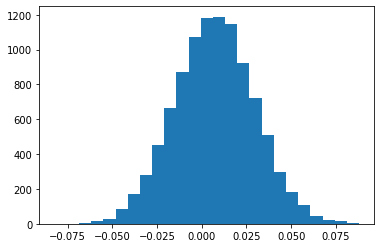

In [10]:
plt.hist(nrv.rvs(10_000), bins=25)